# Part 1.6 Creating Neighborhood Tiers

This notebook will use the cleaned and merged yelp-housing data and create Neighborhood Tiers. The final transformed data will be used in Data Exploration and Machine Learning Models.

House prices in every state and city are very different accross the country, for example, house prices for similar size/type houses in San Jose, CA and Tucson, AZ are dramatically different. To eliminate the bias of very large and small data in housing prices, we will calculate a multiplier. 

#### Extract: 
Data Source: 3 csvs from the cleaned and merged yelp-housing data
#### Transform:
* We will first merge all the 3 csvs on 'postal code'
* We will then create Neighborhood Tiers
    * Then we will create neighborhood tiers
    * We will first calculate the mean house price group by State
    * Next we will divide each postal_code's house price by the corresponding State's mean house price
    * This gives us a multiplier for each house price in the dataframe.
    * Next we will determine the upper and lower quantiles and max of the neighborhood indicators to categorize the neighborhood indicators based on the bins.
    * We will assign '1' for Tier1 neighborhoods that are Above average Neighborhood tier
    * We will assign '2' for Below average neighborhood tier 

#### Load: 
We will load the transformed data into a csv to be loaded in to the AWS for easy retrieval. 
    


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
from functools import reduce
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Extract

In [2]:
#Read csv file
df_stars = pd.read_csv("Final_zip_cat_stars_avg.csv")

print(f"Shape of Yelp dataset:{df_stars.shape}")
df_stars.head()

Shape of Yelp dataset:(13988, 212)


,postal_code,bars_stars,newamerican_stars,wine_bars_stars,italian_stars,tapasmallplates_stars,pizza_stars,breakfast_brunch_stars,mexican_stars,mediterranean_stars,sandwiches_stars,pubs_stars,breweries_stars,cajun_stars,seafood_stars,desserts_stars,cafes_stars,venezuelan_stars,coffee_stars,comfortfood_stars,tradamerican_stars,cocktailbars_stars,bagels_stars,salad_stars,burgers_stars,korean_stars,chicken_wings_stars,french_stars,fishnchips_stars,asianfusion_stars,ramen_stars,hotdogs_stars,filipino_stars,beerbar_stars,irish_stars,mideastern_stars,japanese_stars,thai_stars,chinese_stars,vietnamese_stars,bbq_stars,gastropubs_stars,noodles_stars,sushi_stars,himalayan_stars,indpak_stars,chickenshop_stars,australian_stars,brazilian_stars,japacurry_stars,brewpubs_stars,hotdog_stars,tex-mex_stars,conveyorsushi_stars,sportsbars_stars,modern_european_stars,georgian_stars,vegan_stars,southern_stars,turkish_stars,kebab_stars,steak_stars,scandinavian_stars,colombian_stars,juicebars_stars,cupcakes_stars,caribbean_stars,creperies_stars,falafel_stars,greek_stars,tacos_stars,uzbek_stars,latin_stars,bakeries_stars,hawaiian_stars,diners_stars,popuprestaurants_stars,scottish_stars,vegetarian_stars,soup_stars,kosher_stars,dimsum_stars,cantonese_stars,beergardens_stars,szechuan_stars,whiskeybars_stars,spanish_stars,portuguese_stars,southafrican_stars,hotpot_stars,puertorican_stars,tapas_stars,malaysian_stars,singaporean_stars,wraps_stars,waffles_stars,lebanese_stars,bubbletea_stars,taiwanese_stars,raw_food_stars,halal_stars,gluten_free_stars,delis_stars,cuban_stars,german_stars,argentine_stars,beer_and_wine_stars,gaybars_stars,pancakes_stars,donuts_stars,supperclubs_stars,foodtrucks_stars,poke_stars,peruvian_stars,russian_stars,british_stars,indonesian_stars,icecream_stars,pastashops_stars,shavedice_stars,gourmet_stars,cideries_stars,panasian_stars,brasseries_stars,empanadas_stars,irish_pubs_stars,polish_stars,divebars_stars,pakistani_stars,izakaya_stars,hainan_stars,ukrainian_stars,soulfood_stars,cheesesteaks_stars,newmexican_stars,persian_stars,tikibars_stars,gelato_stars,tuscan_stars,themedcafes_stars,eatertainment_stars,moroccan_stars,foodstands_stars,salvadoran_stars,dominican_stars,drivethrubars_stars,smokehouse_stars,african_stars,buffets_stars,diyfood_stars,streetvendors_stars,shanghainese_stars,tea_stars,cakeshop_stars,teppanyaki_stars,haitian_stars,afghani_stars,customcakes_stars,honduran_stars,austrian_stars,srilankan_stars,burmese_stars,wineries_stars,hkcafe_stars,mongolian_stars,fondue_stars,acaibowls_stars,ethiopian_stars,meaderies_stars,armenian_stars,pianobars_stars,cheese_stars,coffeeroasteries_stars,basque_stars,somali_stars,sicilian_stars,distilleries_stars,laotian_stars,egyptian_stars,pretzels_stars,internetcafe_stars,macarons_stars,cambodian_stars,belgian_stars,eritrean_stars,champagne_bars_stars,nicaraguan_stars,poutineries_stars,speakeasies_stars,syrian_stars,arabian_stars,polynesian_stars,catalan_stars,trinidadian_stars,hungarian_stars,calabrian_stars,czech_stars,guamanian_stars,sardinian_stars,senegalese_stars,bangladeshi_stars,bulgarian_stars,kombucha_stars,iberian_stars,piadina_stars,vermouthbars_stars,shavedsnow_stars,pubfood_stars,bistros_stars,modern_australian_stars,rotisserie_chicken_stars,slovakian_stars
0,1267.0,3.5,NaN,NaN,NaN,NaN,4.0,3.666667,3.833333,4.0,1.0,3.0,NaN,NaN,4.0,4.5,4.333333,NaN,NaN,NaN,3.583333,NaN,NaN,3.75,NaN,4.5,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,3.75,4.0,3.5,NaN,NaN,NaN,NaN,4.5,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
df_stars = df_stars.fillna(0)
df_stars.head()

,postal_code,bars_stars,newamerican_stars,wine_bars_stars,italian_stars,tapasmallplates_stars,pizza_stars,breakfast_brunch_stars,mexican_stars,mediterranean_stars,sandwiches_stars,pubs_stars,breweries_stars,cajun_stars,seafood_stars,desserts_stars,cafes_stars,venezuelan_stars,coffee_stars,comfortfood_stars,tradamerican_stars,cocktailbars_stars,bagels_stars,salad_stars,burgers_stars,korean_stars,chicken_wings_stars,french_stars,fishnchips_stars,asianfusion_stars,ramen_stars,hotdogs_stars,filipino_stars,beerbar_stars,irish_stars,mideastern_stars,japanese_stars,thai_stars,chinese_stars,vietnamese_stars,bbq_stars,gastropubs_stars,noodles_stars,sushi_stars,himalayan_stars,indpak_stars,chickenshop_stars,australian_stars,brazilian_stars,japacurry_stars,brewpubs_stars,hotdog_stars,tex-mex_stars,conveyorsushi_stars,sportsbars_stars,modern_european_stars,georgian_stars,vegan_stars,southern_stars,turkish_stars,kebab_stars,steak_stars,scandinavian_stars,colombian_stars,juicebars_stars,cupcakes_stars,caribbean_stars,creperies_stars,falafel_stars,greek_stars,tacos_stars,uzbek_stars,latin_stars,bakeries_stars,hawaiian_stars,diners_stars,popuprestaurants_stars,scottish_stars,vegetarian_stars,soup_stars,kosher_stars,dimsum_stars,cantonese_stars,beergardens_stars,szechuan_stars,whiskeybars_stars,spanish_stars,portuguese_stars,southafrican_stars,hotpot_stars,puertorican_stars,tapas_stars,malaysian_stars,singaporean_stars,wraps_stars,waffles_stars,lebanese_stars,bubbletea_stars,taiwanese_stars,raw_food_stars,halal_stars,gluten_free_stars,delis_stars,cuban_stars,german_stars,argentine_stars,beer_and_wine_stars,gaybars_stars,pancakes_stars,donuts_stars,supperclubs_stars,foodtrucks_stars,poke_stars,peruvian_stars,russian_stars,british_stars,indonesian_stars,icecream_stars,pastashops_stars,shavedice_stars,gourmet_stars,cideries_stars,panasian_stars,brasseries_stars,empanadas_stars,irish_pubs_stars,polish_stars,divebars_stars,pakistani_stars,izakaya_stars,hainan_stars,ukrainian_stars,soulfood_stars,cheesesteaks_stars,newmexican_stars,persian_stars,tikibars_stars,gelato_stars,tuscan_stars,themedcafes_stars,eatertainment_stars,moroccan_stars,foodstands_stars,salvadoran_stars,dominican_stars,drivethrubars_stars,smokehouse_stars,african_stars,buffets_stars,diyfood_stars,streetvendors_stars,shanghainese_stars,tea_stars,cakeshop_stars,teppanyaki_stars,haitian_stars,afghani_stars,customcakes_stars,honduran_stars,austrian_stars,srilankan_stars,burmese_stars,wineries_stars,hkcafe_stars,mongolian_stars,fondue_stars,acaibowls_stars,ethiopian_stars,meaderies_stars,armenian_stars,pianobars_stars,cheese_stars,coffeeroasteries_stars,basque_stars,somali_stars,sicilian_stars,distilleries_stars,laotian_stars,egyptian_stars,pretzels_stars,internetcafe_stars,macarons_stars,cambodian_stars,belgian_stars,eritrean_stars,champagne_bars_stars,nicaraguan_stars,poutineries_stars,speakeasies_stars,syrian_stars,arabian_stars,polynesian_stars,catalan_stars,trinidadian_stars,hungarian_stars,calabrian_stars,czech_stars,guamanian_stars,sardinian_stars,senegalese_stars,bangladeshi_stars,bulgarian_stars,kombucha_stars,iberian_stars,piadina_stars,vermouthbars_stars,shavedsnow_stars,pubfood_stars,bistros_stars,modern_australian_stars,rotisserie_chicken_stars,slovakian_stars
0,1267.0,3.5,0.0,0.0,0.0,0.0,4.0,3.666667,3.833333,4.0,1.0,3.0,0.0,0.0,4.0,4.5,4.333333,0.0,0.0,0.0,3.583333,0.0,0.0,3.75,0.0,4.5,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,3.75,4.0,3.5,0.0,0.0,0.0,0.0,4.5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [4]:
#read csv categories
df_cat = pd.read_csv("Final_zip_categories_sum.csv")

print(f"Shape of Yelp category dataset:{df_cat.shape}")
df_cat.head()

Shape of Yelp category dataset:(13988, 212)


,postal_code,bars,newamerican,wine_bars,italian,tapasmallplates,pizza,breakfast_brunch,mexican,mediterranean,sandwiches,pubs,breweries,cajun,seafood,desserts,cafes,venezuelan,coffee,comfortfood,tradamerican,cocktailbars,bagels,salad,burgers,korean,chicken_wings,french,fishnchips,asianfusion,ramen,hotdogs,filipino,beerbar,irish,mideastern,japanese,thai,chinese,vietnamese,bbq,gastropubs,noodles,sushi,himalayan,indpak,chickenshop,australian,brazilian,japacurry,brewpubs,hotdog,tex-mex,conveyorsushi,sportsbars,modern_european,georgian,vegan,southern,turkish,kebab,steak,scandinavian,colombian,juicebars,cupcakes,caribbean,creperies,falafel,greek,tacos,uzbek,latin,bakeries,hawaiian,diners,popuprestaurants,scottish,vegetarian,soup,kosher,dimsum,cantonese,beergardens,szechuan,whiskeybars,spanish,portuguese,southafrican,hotpot,puertorican,tapas,malaysian,singaporean,wraps,waffles,lebanese,bubbletea,taiwanese,raw_food,halal,gluten_free,delis,cuban,german,argentine,beer_and_wine,gaybars,pancakes,donuts,supperclubs,foodtrucks,poke,peruvian,russian,british,indonesian,icecream,pastashops,shavedice,gourmet,cideries,panasian,brasseries,empanadas,irish_pubs,polish,divebars,pakistani,izakaya,hainan,ukrainian,soulfood,cheesesteaks,newmexican,persian,tikibars,gelato,tuscan,themedcafes,eatertainment,moroccan,foodstands,salvadoran,dominican,drivethrubars,smokehouse,african,buffets,diyfood,streetvendors,shanghainese,tea,cakeshop,teppanyaki,haitian,afghani,customcakes,honduran,austrian,srilankan,burmese,wineries,hkcafe,mongolian,fondue,acaibowls,ethiopian,meaderies,armenian,pianobars,cheese,coffeeroasteries,basque,somali,sicilian,distilleries,laotian,egyptian,pretzels,internetcafe,macarons,cambodian,belgian,eritrean,champagne_bars,nicaraguan,poutineries,speakeasies,syrian,arabian,polynesian,catalan,trinidadian,hungarian,calabrian,czech,guamanian,sardinian,senegalese,bangladeshi,bulgarian,kombucha,iberian,piadina,vermouthbars,shavedsnow,pubfood,bistros,modern_australian,rotisserie_chicken,slovakian
0,1267.0,2.0,0.0,0.0,0.0,0.0,4.0,3.0,3.0,2.0,1.0,1.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,6.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2886.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [5]:
#read csv categories
df_summary = pd.read_csv("Final_yelp_zip_summary.csv")

print(f"Shape of Yelp summary dataset:{df_summary.shape}")
df_summary.head()

Shape of Yelp summary dataset:(13988, 26)


,postal_code,City,State,CountyName,2021,total_restaurants,total_reviews,avg_rating,total_delivery,total_pickup,total_rest_reservation,total_price_1,total_price_2,total_price_3,total_price_4,total_0.0_stars,total_1.0_stars,total_1.5_stars,total_2.0_stars,total_2.5_stars,total_3.0_stars,total_3.5_stars,total_4.0_stars,total_4.5_stars,total_5.0_stars,num_rest_types
0,1267.0,Williamstown,MA,Berkshire County,357029.0,23,1347.0,3.782609,1.0,2.0,0.0,4.0,14.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,5.0,11.0,3.0,1.0,23
1,2134.0,Boston,MA,Suffolk County,620830.0,1,2.0,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,2886.0,Warwick,RI,Kent County,315398.0,1,28.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3079.0,Salem,NH,Rockingham County,458081.0,1,1.0,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
4,3276.0,Northfield,NH,Merrimack County,283171.0,1,1.0,2.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# Transform

#### Merge dataframes

In [6]:
#merge
# Merge dataframes
frames2 = [df_summary, df_stars, df_cat]
df_merge = reduce(lambda left,right: pd.merge(left,right,on='postal_code'), frames2)
print(df_merge.shape)
df_merge.head()

(13988, 448)


,postal_code,City,State,CountyName,2021,total_restaurants,total_reviews,avg_rating,total_delivery,total_pickup,total_rest_reservation,total_price_1,total_price_2,total_price_3,total_price_4,total_0.0_stars,total_1.0_stars,total_1.5_stars,total_2.0_stars,total_2.5_stars,total_3.0_stars,total_3.5_stars,total_4.0_stars,total_4.5_stars,total_5.0_stars,num_rest_types,bars_stars,newamerican_stars,wine_bars_stars,italian_stars,tapasmallplates_stars,pizza_stars,breakfast_brunch_stars,mexican_stars,mediterranean_stars,sandwiches_stars,pubs_stars,breweries_stars,cajun_stars,seafood_stars,desserts_stars,cafes_stars,venezuelan_stars,coffee_stars,comfortfood_stars,tradamerican_stars,cocktailbars_stars,bagels_stars,salad_stars,burgers_stars,korean_stars,chicken_wings_stars,french_stars,fishnchips_stars,asianfusion_stars,ramen_stars,hotdogs_stars,filipino_stars,beerbar_stars,irish_stars,mideastern_stars,japanese_stars,thai_stars,chinese_stars,vietnamese_stars,bbq_stars,gastropubs_stars,noodles_stars,sushi_stars,himalayan_stars,indpak_stars,chickenshop_stars,australian_stars,brazilian_stars,japacurry_stars,brewpubs_stars,hotdog_stars,tex-mex_stars,conveyorsushi_stars,sportsbars_stars,modern_european_stars,georgian_stars,vegan_stars,southern_stars,turkish_stars,kebab_stars,steak_stars,scandinavian_stars,colombian_stars,juicebars_stars,cupcakes_stars,caribbean_stars,creperies_stars,falafel_stars,greek_stars,tacos_stars,uzbek_stars,latin_stars,bakeries_stars,hawaiian_stars,diners_stars,popuprestaurants_stars,scottish_stars,vegetarian_stars,soup_stars,kosher_stars,dimsum_stars,cantonese_stars,beergardens_stars,szechuan_stars,whiskeybars_stars,spanish_stars,portuguese_stars,southafrican_stars,hotpot_stars,puertorican_stars,tapas_stars,malaysian_stars,singaporean_stars,wraps_stars,waffles_stars,lebanese_stars,bubbletea_stars,taiwanese_stars,raw_food_stars,halal_stars,gluten_free_stars,delis_stars,cuban_stars,german_stars,argentine_stars,beer_and_wine_stars,gaybars_stars,pancakes_stars,donuts_stars,supperclubs_stars,foodtrucks_stars,poke_stars,peruvian_stars,russian_stars,british_stars,indonesian_stars,icecream_stars,pastashops_stars,shavedice_stars,gourmet_stars,cideries_stars,panasian_stars,brasseries_stars,empanadas_stars,irish_pubs_stars,polish_stars,divebars_stars,pakistani_stars,izakaya_stars,hainan_stars,ukrainian_stars,soulfood_stars,cheesesteaks_stars,newmexican_stars,persian_stars,tikibars_stars,gelato_stars,tuscan_stars,themedcafes_stars,eatertainment_stars,moroccan_stars,foodstands_stars,salvadoran_stars,dominican_stars,drivethrubars_stars,smokehouse_stars,african_stars,buffets_stars,diyfood_stars,streetvendors_stars,shanghainese_stars,tea_stars,cakeshop_stars,teppanyaki_stars,haitian_stars,afghani_stars,customcakes_stars,honduran_stars,austrian_stars,srilankan_stars,burmese_stars,wineries_stars,hkcafe_stars,mongolian_stars,fondue_stars,acaibowls_stars,ethiopian_stars,meaderies_stars,armenian_stars,pianobars_stars,cheese_stars,coffeeroasteries_stars,basque_stars,somali_stars,sicilian_stars,distilleries_stars,laotian_stars,egyptian_stars,pretzels_stars,internetcafe_stars,macarons_stars,cambodian_stars,belgian_stars,eritrean_stars,champagne_bars_stars,nicaraguan_stars,poutineries_stars,speakeasies_stars,syrian_stars,arabian_stars,polynesian_stars,catalan_stars,trinidadian_stars,hungarian_stars,calabrian_stars,czech_stars,guamanian_stars,sardinian_stars,senegalese_stars,bangladeshi_stars,bulgarian_stars,kombucha_stars,iberian_stars,piadina_stars,vermouthbars_stars,shavedsnow_stars,pubfood_stars,bistros_stars,modern_australian_stars,rotisserie_chicken_stars,slovakian_stars,bars,newamerican,wine_bars,italian,tapasmallplates,pizza,breakfast_brunch,mexican,mediterranean,sandwiches,pubs,breweries,cajun,seafood,desserts,cafes,venezuelan,coffee,comfortfood,tradamerican,cocktailbars,bagels,salad,burgers,korean,chicken_wings,french,fishnchips,asianfusion,ramen,hotdogs,filipino,beerbar,irish,mideastern,japanese,thai,chinese,vietnamese,bbq,gastropubs,

### Neighborhood Tiers

House prices in every state and city are very different accross the country, for example, house prices for similar size/type houses in San Jose, CA and Tucson, AZ are dramatically different. To eliminate the bias of very large and small data in housing prices, we will calculate a multiplier. 

* We will first calculate the mean house price group by State
* Next we will divide each postal_code's house price by the corresponding State's mean house price
* This gives us a multiplier for each house price in the dataframe.

In [7]:
# Calculate the average house price per county
per_state_mean_price = df_merge.groupby(['State']).mean()['2021'].round(0)

In [8]:
per_state_mean_price.head()

State
AK    302676.0
AL    162723.0
AR    133404.0
AZ    376968.0
CA    881718.0
Name: 2021, dtype: float64

In [11]:
# create dataframe that shows Average County House Price
state_price_df = pd.DataFrame({"Average State House Price": per_state_mean_price})

In [12]:
state_price_df.head()

,Average State House Price
State,
AK,302676.0
AL,162723.0
AR,133404.0
AZ,376968.0
CA,881718.0


In [13]:
# Merge dataframes
frames2 = [df_merge, state_price_df]
neighborhood_df = reduce(lambda left,right: pd.merge(left,right,on='State'), frames2)

In [14]:
neighborhood_df.head(10)

,postal_code,City,State,CountyName,2021,total_restaurants,total_reviews,avg_rating,total_delivery,total_pickup,total_rest_reservation,total_price_1,total_price_2,total_price_3,total_price_4,total_0.0_stars,total_1.0_stars,total_1.5_stars,total_2.0_stars,total_2.5_stars,total_3.0_stars,total_3.5_stars,total_4.0_stars,total_4.5_stars,total_5.0_stars,num_rest_types,bars_stars,newamerican_stars,wine_bars_stars,italian_stars,tapasmallplates_stars,pizza_stars,breakfast_brunch_stars,mexican_stars,mediterranean_stars,sandwiches_stars,pubs_stars,breweries_stars,cajun_stars,seafood_stars,desserts_stars,cafes_stars,venezuelan_stars,coffee_stars,comfortfood_stars,tradamerican_stars,cocktailbars_stars,bagels_stars,salad_stars,burgers_stars,korean_stars,chicken_wings_stars,french_stars,fishnchips_stars,asianfusion_stars,ramen_stars,hotdogs_stars,filipino_stars,beerbar_stars,irish_stars,mideastern_stars,japanese_stars,thai_stars,chinese_stars,vietnamese_stars,bbq_stars,gastropubs_stars,noodles_stars,sushi_stars,himalayan_stars,indpak_stars,chickenshop_stars,australian_stars,brazilian_stars,japacurry_stars,brewpubs_stars,hotdog_stars,tex-mex_stars,conveyorsushi_stars,sportsbars_stars,modern_european_stars,georgian_stars,vegan_stars,southern_stars,turkish_stars,kebab_stars,steak_stars,scandinavian_stars,colombian_stars,juicebars_stars,cupcakes_stars,caribbean_stars,creperies_stars,falafel_stars,greek_stars,tacos_stars,uzbek_stars,latin_stars,bakeries_stars,hawaiian_stars,diners_stars,popuprestaurants_stars,scottish_stars,vegetarian_stars,soup_stars,kosher_stars,dimsum_stars,cantonese_stars,beergardens_stars,szechuan_stars,whiskeybars_stars,spanish_stars,portuguese_stars,southafrican_stars,hotpot_stars,puertorican_stars,tapas_stars,malaysian_stars,singaporean_stars,wraps_stars,waffles_stars,lebanese_stars,bubbletea_stars,taiwanese_stars,raw_food_stars,halal_stars,gluten_free_stars,delis_stars,cuban_stars,german_stars,argentine_stars,beer_and_wine_stars,gaybars_stars,pancakes_stars,donuts_stars,supperclubs_stars,foodtrucks_stars,poke_stars,peruvian_stars,russian_stars,british_stars,indonesian_stars,icecream_stars,pastashops_stars,shavedice_stars,gourmet_stars,cideries_stars,panasian_stars,brasseries_stars,empanadas_stars,irish_pubs_stars,polish_stars,divebars_stars,pakistani_stars,izakaya_stars,hainan_stars,ukrainian_stars,soulfood_stars,cheesesteaks_stars,newmexican_stars,persian_stars,tikibars_stars,gelato_stars,tuscan_stars,themedcafes_stars,eatertainment_stars,moroccan_stars,foodstands_stars,salvadoran_stars,dominican_stars,drivethrubars_stars,smokehouse_stars,african_stars,buffets_stars,diyfood_stars,streetvendors_stars,shanghainese_stars,tea_stars,cakeshop_stars,teppanyaki_stars,haitian_stars,afghani_stars,customcakes_stars,honduran_stars,austrian_stars,srilankan_stars,burmese_stars,wineries_stars,hkcafe_stars,mongolian_stars,fondue_stars,acaibowls_stars,ethiopian_stars,meaderies_stars,armenian_stars,pianobars_stars,cheese_stars,coffeeroasteries_stars,basque_stars,somali_stars,sicilian_stars,distilleries_stars,laotian_stars,egyptian_stars,pretzels_stars,internetcafe_stars,macarons_stars,cambodian_stars,belgian_stars,eritrean_stars,champagne_bars_stars,nicaraguan_stars,poutineries_stars,speakeasies_stars,syrian_stars,arabian_stars,polynesian_stars,catalan_stars,trinidadian_stars,hungarian_stars,calabrian_stars,czech_stars,guamanian_stars,sardinian_stars,senegalese_stars,bangladeshi_stars,bulgarian_stars,kombucha_stars,iberian_stars,piadina_stars,vermouthbars_stars,shavedsnow_stars,pubfood_stars,bistros_stars,modern_australian_stars,rotisserie_chicken_stars,slovakian_stars,bars,newamerican,wine_bars,italian,tapasmallplates,pizza,breakfast_brunch,mexican,mediterranean,sandwiches,pubs,breweries,cajun,seafood,desserts,cafes,venezuelan,coffee,comfortfood,tradamerican,cocktailbars,bagels,salad,burgers,korean,chicken_wings,french,fishnchips,asianfusion,ramen,hotdogs,filipino,beerbar,irish,mideastern,japanese,thai,chinese,vietnamese,bbq,gastropubs,

In [15]:
#Calculate multiplier/indicator to address outliers
neighborhood_df["Neighborhood Indicator"] = neighborhood_df["2021"]/neighborhood_df["Average State House Price"]

In [16]:
neighborhood_df.head(10)

,postal_code,City,State,CountyName,2021,total_restaurants,total_reviews,avg_rating,total_delivery,total_pickup,total_rest_reservation,total_price_1,total_price_2,total_price_3,total_price_4,total_0.0_stars,total_1.0_stars,total_1.5_stars,total_2.0_stars,total_2.5_stars,total_3.0_stars,total_3.5_stars,total_4.0_stars,total_4.5_stars,total_5.0_stars,num_rest_types,bars_stars,newamerican_stars,wine_bars_stars,italian_stars,tapasmallplates_stars,pizza_stars,breakfast_brunch_stars,mexican_stars,mediterranean_stars,sandwiches_stars,pubs_stars,breweries_stars,cajun_stars,seafood_stars,desserts_stars,cafes_stars,venezuelan_stars,coffee_stars,comfortfood_stars,tradamerican_stars,cocktailbars_stars,bagels_stars,salad_stars,burgers_stars,korean_stars,chicken_wings_stars,french_stars,fishnchips_stars,asianfusion_stars,ramen_stars,hotdogs_stars,filipino_stars,beerbar_stars,irish_stars,mideastern_stars,japanese_stars,thai_stars,chinese_stars,vietnamese_stars,bbq_stars,gastropubs_stars,noodles_stars,sushi_stars,himalayan_stars,indpak_stars,chickenshop_stars,australian_stars,brazilian_stars,japacurry_stars,brewpubs_stars,hotdog_stars,tex-mex_stars,conveyorsushi_stars,sportsbars_stars,modern_european_stars,georgian_stars,vegan_stars,southern_stars,turkish_stars,kebab_stars,steak_stars,scandinavian_stars,colombian_stars,juicebars_stars,cupcakes_stars,caribbean_stars,creperies_stars,falafel_stars,greek_stars,tacos_stars,uzbek_stars,latin_stars,bakeries_stars,hawaiian_stars,diners_stars,popuprestaurants_stars,scottish_stars,vegetarian_stars,soup_stars,kosher_stars,dimsum_stars,cantonese_stars,beergardens_stars,szechuan_stars,whiskeybars_stars,spanish_stars,portuguese_stars,southafrican_stars,hotpot_stars,puertorican_stars,tapas_stars,malaysian_stars,singaporean_stars,wraps_stars,waffles_stars,lebanese_stars,bubbletea_stars,taiwanese_stars,raw_food_stars,halal_stars,gluten_free_stars,delis_stars,cuban_stars,german_stars,argentine_stars,beer_and_wine_stars,gaybars_stars,pancakes_stars,donuts_stars,supperclubs_stars,foodtrucks_stars,poke_stars,peruvian_stars,russian_stars,british_stars,indonesian_stars,icecream_stars,pastashops_stars,shavedice_stars,gourmet_stars,cideries_stars,panasian_stars,brasseries_stars,empanadas_stars,irish_pubs_stars,polish_stars,divebars_stars,pakistani_stars,izakaya_stars,hainan_stars,ukrainian_stars,soulfood_stars,cheesesteaks_stars,newmexican_stars,persian_stars,tikibars_stars,gelato_stars,tuscan_stars,themedcafes_stars,eatertainment_stars,moroccan_stars,foodstands_stars,salvadoran_stars,dominican_stars,drivethrubars_stars,smokehouse_stars,african_stars,buffets_stars,diyfood_stars,streetvendors_stars,shanghainese_stars,tea_stars,cakeshop_stars,teppanyaki_stars,haitian_stars,afghani_stars,customcakes_stars,honduran_stars,austrian_stars,srilankan_stars,burmese_stars,wineries_stars,hkcafe_stars,mongolian_stars,fondue_stars,acaibowls_stars,ethiopian_stars,meaderies_stars,armenian_stars,pianobars_stars,cheese_stars,coffeeroasteries_stars,basque_stars,somali_stars,sicilian_stars,distilleries_stars,laotian_stars,egyptian_stars,pretzels_stars,internetcafe_stars,macarons_stars,cambodian_stars,belgian_stars,eritrean_stars,champagne_bars_stars,nicaraguan_stars,poutineries_stars,speakeasies_stars,syrian_stars,arabian_stars,polynesian_stars,catalan_stars,trinidadian_stars,hungarian_stars,calabrian_stars,czech_stars,guamanian_stars,sardinian_stars,senegalese_stars,bangladeshi_stars,bulgarian_stars,kombucha_stars,iberian_stars,piadina_stars,vermouthbars_stars,shavedsnow_stars,pubfood_stars,bistros_stars,modern_australian_stars,rotisserie_chicken_stars,slovakian_stars,bars,newamerican,wine_bars,italian,tapasmallplates,pizza,breakfast_brunch,mexican,mediterranean,sandwiches,pubs,breweries,cajun,seafood,desserts,cafes,venezuelan,coffee,comfortfood,tradamerican,cocktailbars,bagels,salad,burgers,korean,chicken_wings,french,fishnchips,asianfusion,ramen,hotdogs,filipino,beerbar,irish,mideastern,japanese,thai,chinese,vietnamese,bbq,gastropubs,

### Create neighborhood tiers


In [17]:
# check ranges for determining bins

#check the lower quantile indicator
neighborhood_df["Neighborhood Indicator"].quantile(q=0.25)


0.6282424577859849

In [18]:
neighborhood_df["Neighborhood Indicator"].quantile(q=0.5)

0.8858902745210271

In [19]:
#check the upper quantile indicator
neighborhood_df["Neighborhood Indicator"].quantile(q=0.75)

1.2323577099831353

In [20]:
#check the max indicator
neighborhood_df["Neighborhood Indicator"].max()

13.498176151057606

### Tiers

|    Tier1          |    Tier2         |        
|-------------------|------------------|
|    > 0.89.        |   0 - 0.89       |
|-------------------|------------------|
| high tier         |   low tier.      |  
|-------------------|------------------|


In [21]:
# Cut the neighborhood indicator into the tiers.
spending_bins = [0, 0.89, 14]
group_names = ["2", "1"]


In [22]:
# Categorize neighborhood indicators based on the bins.
neighborhood_df["Neighborhood Tiers"] = pd.cut(neighborhood_df["Neighborhood Indicator"], spending_bins, labels=group_names)
neighborhood_df.head()

,postal_code,City,State,CountyName,2021,total_restaurants,total_reviews,avg_rating,total_delivery,total_pickup,total_rest_reservation,total_price_1,total_price_2,total_price_3,total_price_4,total_0.0_stars,total_1.0_stars,total_1.5_stars,total_2.0_stars,total_2.5_stars,total_3.0_stars,total_3.5_stars,total_4.0_stars,total_4.5_stars,total_5.0_stars,num_rest_types,bars_stars,newamerican_stars,wine_bars_stars,italian_stars,tapasmallplates_stars,pizza_stars,breakfast_brunch_stars,mexican_stars,mediterranean_stars,sandwiches_stars,pubs_stars,breweries_stars,cajun_stars,seafood_stars,desserts_stars,cafes_stars,venezuelan_stars,coffee_stars,comfortfood_stars,tradamerican_stars,cocktailbars_stars,bagels_stars,salad_stars,burgers_stars,korean_stars,chicken_wings_stars,french_stars,fishnchips_stars,asianfusion_stars,ramen_stars,hotdogs_stars,filipino_stars,beerbar_stars,irish_stars,mideastern_stars,japanese_stars,thai_stars,chinese_stars,vietnamese_stars,bbq_stars,gastropubs_stars,noodles_stars,sushi_stars,himalayan_stars,indpak_stars,chickenshop_stars,australian_stars,brazilian_stars,japacurry_stars,brewpubs_stars,hotdog_stars,tex-mex_stars,conveyorsushi_stars,sportsbars_stars,modern_european_stars,georgian_stars,vegan_stars,southern_stars,turkish_stars,kebab_stars,steak_stars,scandinavian_stars,colombian_stars,juicebars_stars,cupcakes_stars,caribbean_stars,creperies_stars,falafel_stars,greek_stars,tacos_stars,uzbek_stars,latin_stars,bakeries_stars,hawaiian_stars,diners_stars,popuprestaurants_stars,scottish_stars,vegetarian_stars,soup_stars,kosher_stars,dimsum_stars,cantonese_stars,beergardens_stars,szechuan_stars,whiskeybars_stars,spanish_stars,portuguese_stars,southafrican_stars,hotpot_stars,puertorican_stars,tapas_stars,malaysian_stars,singaporean_stars,wraps_stars,waffles_stars,lebanese_stars,bubbletea_stars,taiwanese_stars,raw_food_stars,halal_stars,gluten_free_stars,delis_stars,cuban_stars,german_stars,argentine_stars,beer_and_wine_stars,gaybars_stars,pancakes_stars,donuts_stars,supperclubs_stars,foodtrucks_stars,poke_stars,peruvian_stars,russian_stars,british_stars,indonesian_stars,icecream_stars,pastashops_stars,shavedice_stars,gourmet_stars,cideries_stars,panasian_stars,brasseries_stars,empanadas_stars,irish_pubs_stars,polish_stars,divebars_stars,pakistani_stars,izakaya_stars,hainan_stars,ukrainian_stars,soulfood_stars,cheesesteaks_stars,newmexican_stars,persian_stars,tikibars_stars,gelato_stars,tuscan_stars,themedcafes_stars,eatertainment_stars,moroccan_stars,foodstands_stars,salvadoran_stars,dominican_stars,drivethrubars_stars,smokehouse_stars,african_stars,buffets_stars,diyfood_stars,streetvendors_stars,shanghainese_stars,tea_stars,cakeshop_stars,teppanyaki_stars,haitian_stars,afghani_stars,customcakes_stars,honduran_stars,austrian_stars,srilankan_stars,burmese_stars,wineries_stars,hkcafe_stars,mongolian_stars,fondue_stars,acaibowls_stars,ethiopian_stars,meaderies_stars,armenian_stars,pianobars_stars,cheese_stars,coffeeroasteries_stars,basque_stars,somali_stars,sicilian_stars,distilleries_stars,laotian_stars,egyptian_stars,pretzels_stars,internetcafe_stars,macarons_stars,cambodian_stars,belgian_stars,eritrean_stars,champagne_bars_stars,nicaraguan_stars,poutineries_stars,speakeasies_stars,syrian_stars,arabian_stars,polynesian_stars,catalan_stars,trinidadian_stars,hungarian_stars,calabrian_stars,czech_stars,guamanian_stars,sardinian_stars,senegalese_stars,bangladeshi_stars,bulgarian_stars,kombucha_stars,iberian_stars,piadina_stars,vermouthbars_stars,shavedsnow_stars,pubfood_stars,bistros_stars,modern_australian_stars,rotisserie_chicken_stars,slovakian_stars,bars,newamerican,wine_bars,italian,tapasmallplates,pizza,breakfast_brunch,mexican,mediterranean,sandwiches,pubs,breweries,cajun,seafood,desserts,cafes,venezuelan,coffee,comfortfood,tradamerican,cocktailbars,bagels,salad,burgers,korean,chicken_wings,french,fishnchips,asianfusion,ramen,hotdogs,filipino,beerbar,irish,mideastern,japanese,thai,chinese,vietnamese,bbq,gastropubs,

In [23]:
neighborhood_df["Neighborhood Tiers"].value_counts()

2    7039
1    6949
Name: Neighborhood Tiers, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff6830f7410>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff68310d550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff68398bfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff68310db90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff68310ded0>],
 'means': []}

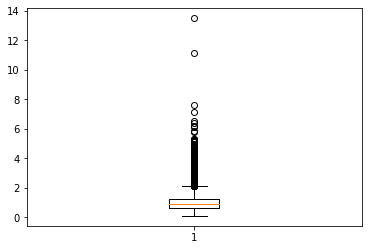

In [24]:
x=neighborhood_df["Neighborhood Indicator"]
plt.boxplot(x)

In [25]:
# Export joined_df to csv
file = "neighborhood_2tiers_state_categories.csv"
neighborhood_df.to_csv(file, index=False)